In [0]:
pip install networkx

In [0]:
import networkx as nx
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive', force_remount=True)
G1 =nx.read_edgelist('/content/drive/My Drive/facebook_combined.txt', create_using = nx.Graph(), nodetype=int)

Mounted at /content/drive


In [0]:
print(nx.info(G1))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


[107, 1684, 3437, 1912, 1085]

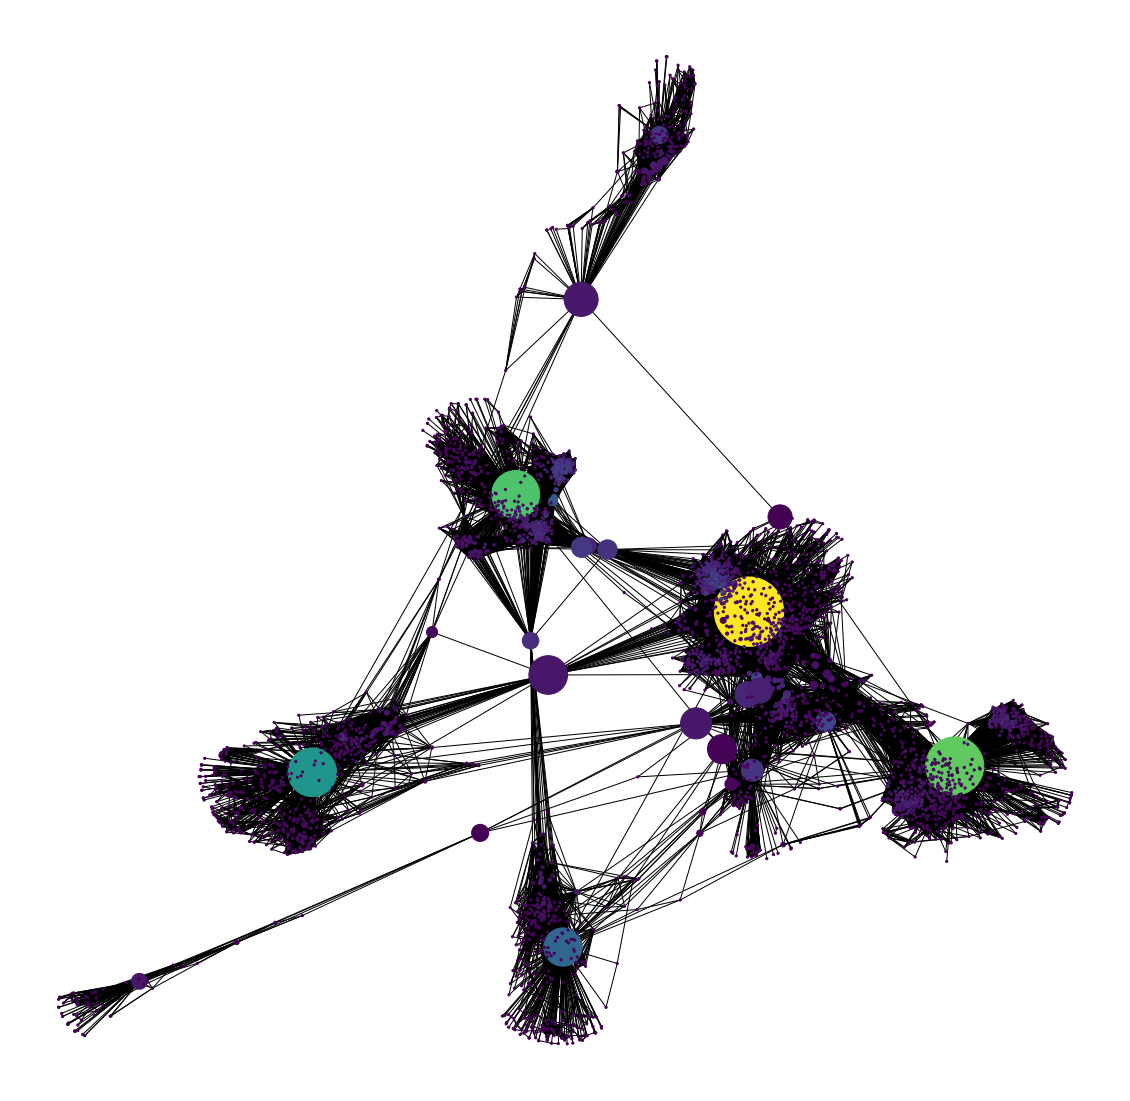

In [0]:
pos = nx.spring_layout(G1)
betCent = nx.betweenness_centrality(G1, normalized=True, endpoints=True)
node_color = [20000.0 * G1.degree(v) for v in G1]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G1, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')
sorted(betCent, key=betCent.get, reverse=True)[:5]

**Between Centrality** merupakan titik (node) yang paling penting karna menjadi titik yang memiliki banyak persimpangan terdekat dengan titik lain yang merupakan titik centralisasi. Dimana jika titik ini mengalami gangguan maka tidak ada jalan lain yang sebaik titik tersebut

[107, 1684, 1912, 3437, 0]

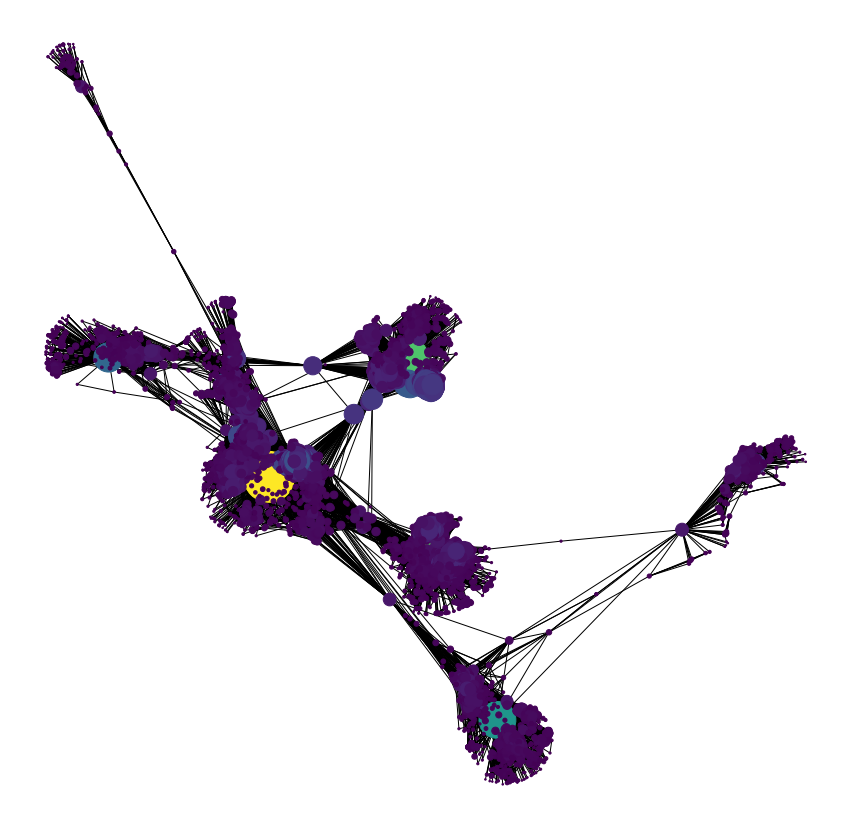

In [0]:
pos = nx.spring_layout(G1)
degCent = nx.degree_centrality(G1)
node_color = [20000.0 * G1.degree(v) for v in G1]
node_size =  [v * 10000 for v in degCent.values()]
plt.figure(figsize=(15,15))
nx.draw_networkx(G1, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

sorted(degCent, key=degCent.get, reverse=True)[:5]

**Degree Centrality** merupakan titik yang memiliki koneksi terbanyak terhadap titik lain

In [0]:
sorted(degCent, key=degCent.get, reverse=True)[:5]

[107, 1684, 1912, 3437, 0]

[107, 58, 428, 563, 1684]

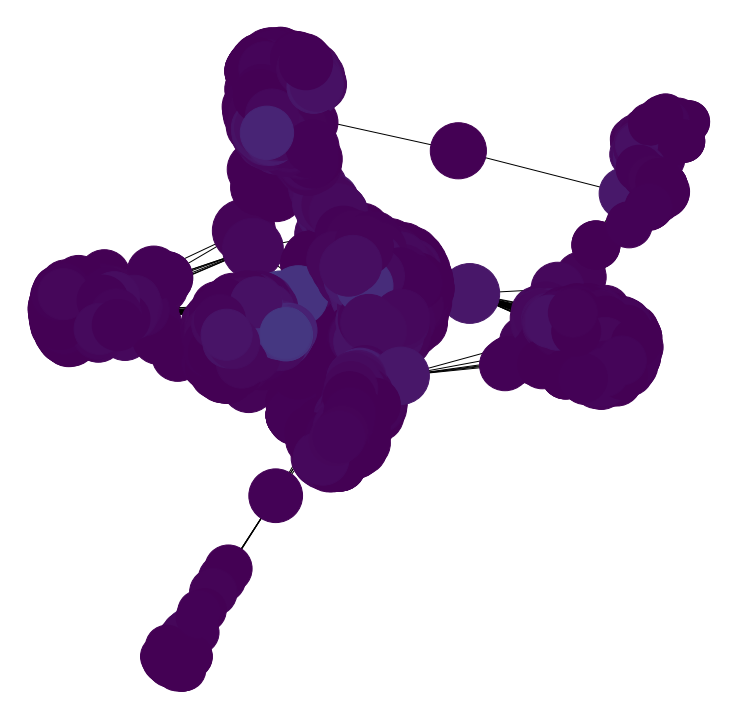

In [0]:
pos = nx.spring_layout(G1)
cloCent = nx.closeness_centrality(G1)
node_color = [20000.0 * G1.degree(v) for v in G1]
node_size =  [v * 10000 for v in cloCent.values()]
plt.figure(figsize=(13,13))
nx.draw_networkx(G1, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')
sorted(cloCent, key=cloCent.get, reverse=True)[:5]

**Closeness Centrality** jarak rata-rata antara node dengan semua node yang lain di jaringan. Ukuran ini menggambarkan kedekatan node ini dengan node lain.  Semakin dekat, semakin terhubung orang tersebut dengan lainnya.

In [0]:
max(x for x,y in nx.degree(G1))

4038

In [0]:
sources = [20,40,65,75]
targets = [650,802,920,1010] 
for i in range(4):
    path = nx.shortest_path(G1,source=sources[i],target=targets[i])
    length = nx.shortest_path_length(G1,source=sources[i],target=targets[i],method='dijkstra')
    print("Shortest Path between Node ", str(sources[i])," ---> ", str(targets[i]), " is ",
          str(path), " ,Length = ", str(length))

Shortest Path between Node  20  --->  650  is  [20, 0, 34, 414, 650]  ,Length =  4
Shortest Path between Node  40  --->  802  is  [40, 0, 58, 1684, 860, 698, 686, 802]  ,Length =  7
Shortest Path between Node  65  --->  920  is  [65, 0, 107, 920]  ,Length =  3
Shortest Path between Node  75  --->  1010  is  [75, 0, 107, 1010]  ,Length =  3


In [0]:
neigh = [1,20,40,65,75,90,1000,]
for i in range(len(neigh)):
    all_neighbors = list(nx.classes.function.all_neighbors(G1,neigh[i]))
    print("All neighbors for Node ", str(neigh[i])," ---> ", str(all_neighbors))

All neighbors for Node  1  --->  [0, 48, 53, 54, 73, 88, 92, 119, 126, 133, 194, 236, 280, 299, 315, 322, 346]
All neighbors for Node  20  --->  [0, 2, 14, 41, 44, 111, 115, 149, 162, 214, 226, 312, 326, 333, 343]
All neighbors for Node  40  --->  [0, 21, 25, 26, 29, 56, 67, 72, 77, 113, 132, 133, 141, 142, 158, 169, 172, 199, 200, 203, 212, 213, 224, 231, 232, 239, 257, 258, 265, 271, 272, 274, 277, 280, 298, 304, 307, 315, 317, 322, 325, 329, 332, 334]
All neighbors for Node  65  --->  [0, 7, 13, 25, 82, 118, 203, 252, 261, 297, 314, 339]
All neighbors for Node  75  --->  [0, 9, 56, 67, 85, 170, 188, 200, 258, 272, 274, 304, 322, 323]
All neighbors for Node  90  --->  [0, 179]
All neighbors for Node  1000  --->  [107, 924, 974, 985, 1010, 1127, 1134, 1228, 1304, 1474, 1640, 1667, 1703, 1725, 1759, 1840]


In [0]:
list(nx.selfloop_edges(G1, keys=True, data=True))
#None []

[]

In [0]:
d = dict(G1.degree()).values()
from collections import Counter
Counter(d)

Counter({1: 75,
         2: 98,
         3: 93,
         4: 99,
         5: 93,
         6: 98,
         7: 98,
         8: 111,
         9: 100,
         10: 95,
         11: 81,
         12: 82,
         13: 79,
         14: 87,
         15: 106,
         16: 82,
         17: 76,
         18: 73,
         19: 72,
         20: 63,
         21: 52,
         22: 63,
         23: 53,
         24: 60,
         25: 55,
         26: 56,
         27: 49,
         28: 37,
         29: 38,
         30: 40,
         31: 38,
         32: 44,
         33: 35,
         34: 43,
         35: 36,
         36: 43,
         37: 43,
         38: 44,
         39: 29,
         40: 27,
         41: 29,
         42: 21,
         43: 29,
         44: 21,
         45: 19,
         46: 24,
         47: 24,
         48: 24,
         49: 33,
         50: 25,
         51: 20,
         52: 19,
         53: 15,
         54: 23,
         55: 23,
         56: 18,
         57: 23,
         58: 15,
         59: 11,
   

(-0.8551430008647508,
 0.9678748857633086,
 -1.0791299159631416,
 0.6617049948711928)

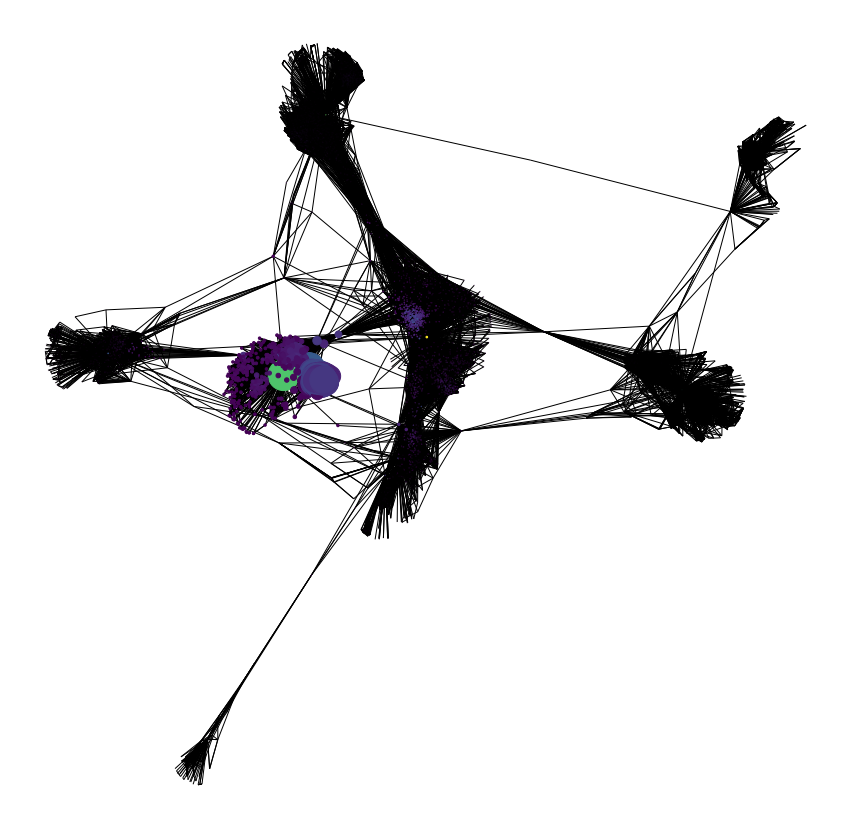

In [0]:
#pos = nx.spring_layout(G1)
eigCent = nx.eigenvector_centrality(G1)
node_color = [20000.0 * G1.degree(v) for v in G1]
node_size =  [v * 10000 for v in eigCent.values()]
plt.figure(figsize=(15,15))
nx.draw_networkx(G1, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

**Eigenvector Centrality** merupakan banyaknya titik yang memiliki hubungan dengan titik yang memiliki hubungan terbanyak. Jadi lebih ke titik kedua dari titik paling banyak memiliki hubungan.

In [0]:
sorted(eigCent, key=eigCent.get, reverse=True)[:5]


NameError: ignored

In [0]:
list(nx.algorithms.community.k_clique_communities(G1,k=2))

NameError: ignored

In [0]:
list(nx.algorithms.core.k_core(G1,k=3))

In [0]:
#nx.algorithms.link_analysis.pagerank_alg.pagerank(G1)